In [3]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import pydotplus

In [9]:
# tree 시각화하려면 다운 받기 !!
pip install pydotplus

     |████████████████████████████████| 278 kB 3.4 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=f6109ac17bf1d54157625538f79ffe217a6f868e7645f9692e63274b53085ec3
  Stored in directory: /Users/JAE111/Library/Caches/pip/wheels/89/e5/de/6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [2]:
# code for learning classification tree

In [9]:
mower_df=pd.read_csv("RidingMowers.csv")
mower_df.head()
mower_df['Ownership']

0        Owner
1        Owner
2        Owner
3        Owner
4        Owner
5        Owner
6        Owner
7        Owner
8        Owner
9        Owner
10       Owner
11       Owner
12    Nonowner
13    Nonowner
14    Nonowner
15    Nonowner
16    Nonowner
17    Nonowner
18    Nonowner
19    Nonowner
20    Nonowner
21    Nonowner
22    Nonowner
23    Nonowner
Name: Ownership, dtype: object

In [5]:
# decision tree 구축

classTree = DecisionTreeClassifier(random_state=0, max_depth=1) 
# max_depth : 몇 번 갈리치기 할 지 횟수 정함 / max_depth=2면 두 번 갈라치기 (None = full tree)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

DecisionTreeClassifier(max_depth=1, random_state=0)

Classes: Nonowner, Owner


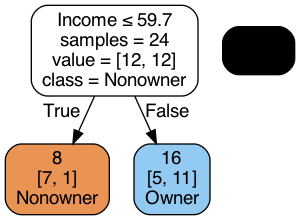

In [4]:
# print

print('Classes: {}'.format(', '.join(classTree.classes_))) # 그냥 classes 종류 직접 출력
plotDecisionTree(classTree, feature_names=mower_df.columns[:2],
                 class_names=classTree.classes_)
# feature_names : 사용하는 예측변수 이름 (리스트 형태) / 안 쓰면 Income<59.7 이렇게 안 나오고 X1<59.7 이렇게 디폴트 변수명으로 나옴
# class_names : 구분할 클래스 이름 / 안 쓰면 각 노드 맨밑의 줄인 Noneowner/Owner(해당 직사각형에서 더 지배적인 클래스 이름) 안 나옴
# classTree.classes_ : fit한 트리모델의 classes_ 메서드로 클래스 이름 확인 가능

In [5]:
mower_df.columns

Index(['Income', 'Lot_Size', 'Ownership'], dtype='object')

In [6]:
classTree.classes_

array(['Nonowner', 'Owner'], dtype=object)

Classes: Nonowner, Owner


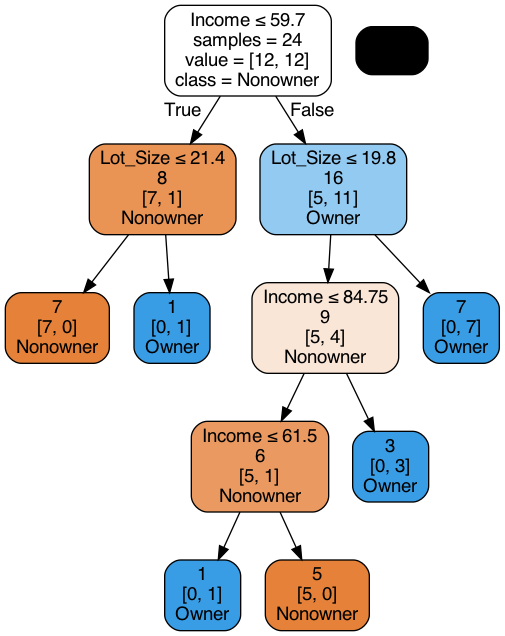

In [7]:
## max_depth = 5  (총 다섯번 갈라치기)


classTree = DecisionTreeClassifier(random_state=0, max_depth=5) 
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
print('Classes: {}'.format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=mower_df.columns[:2],
                 class_names=classTree.classes_)

In [8]:
# code for creating a full-grown classification tree

In [9]:
bank_df = pd.read_csv("UniversalBank.csv")
bank_df.drop(columns=['ID','ZIP Code'], inplace=True)
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


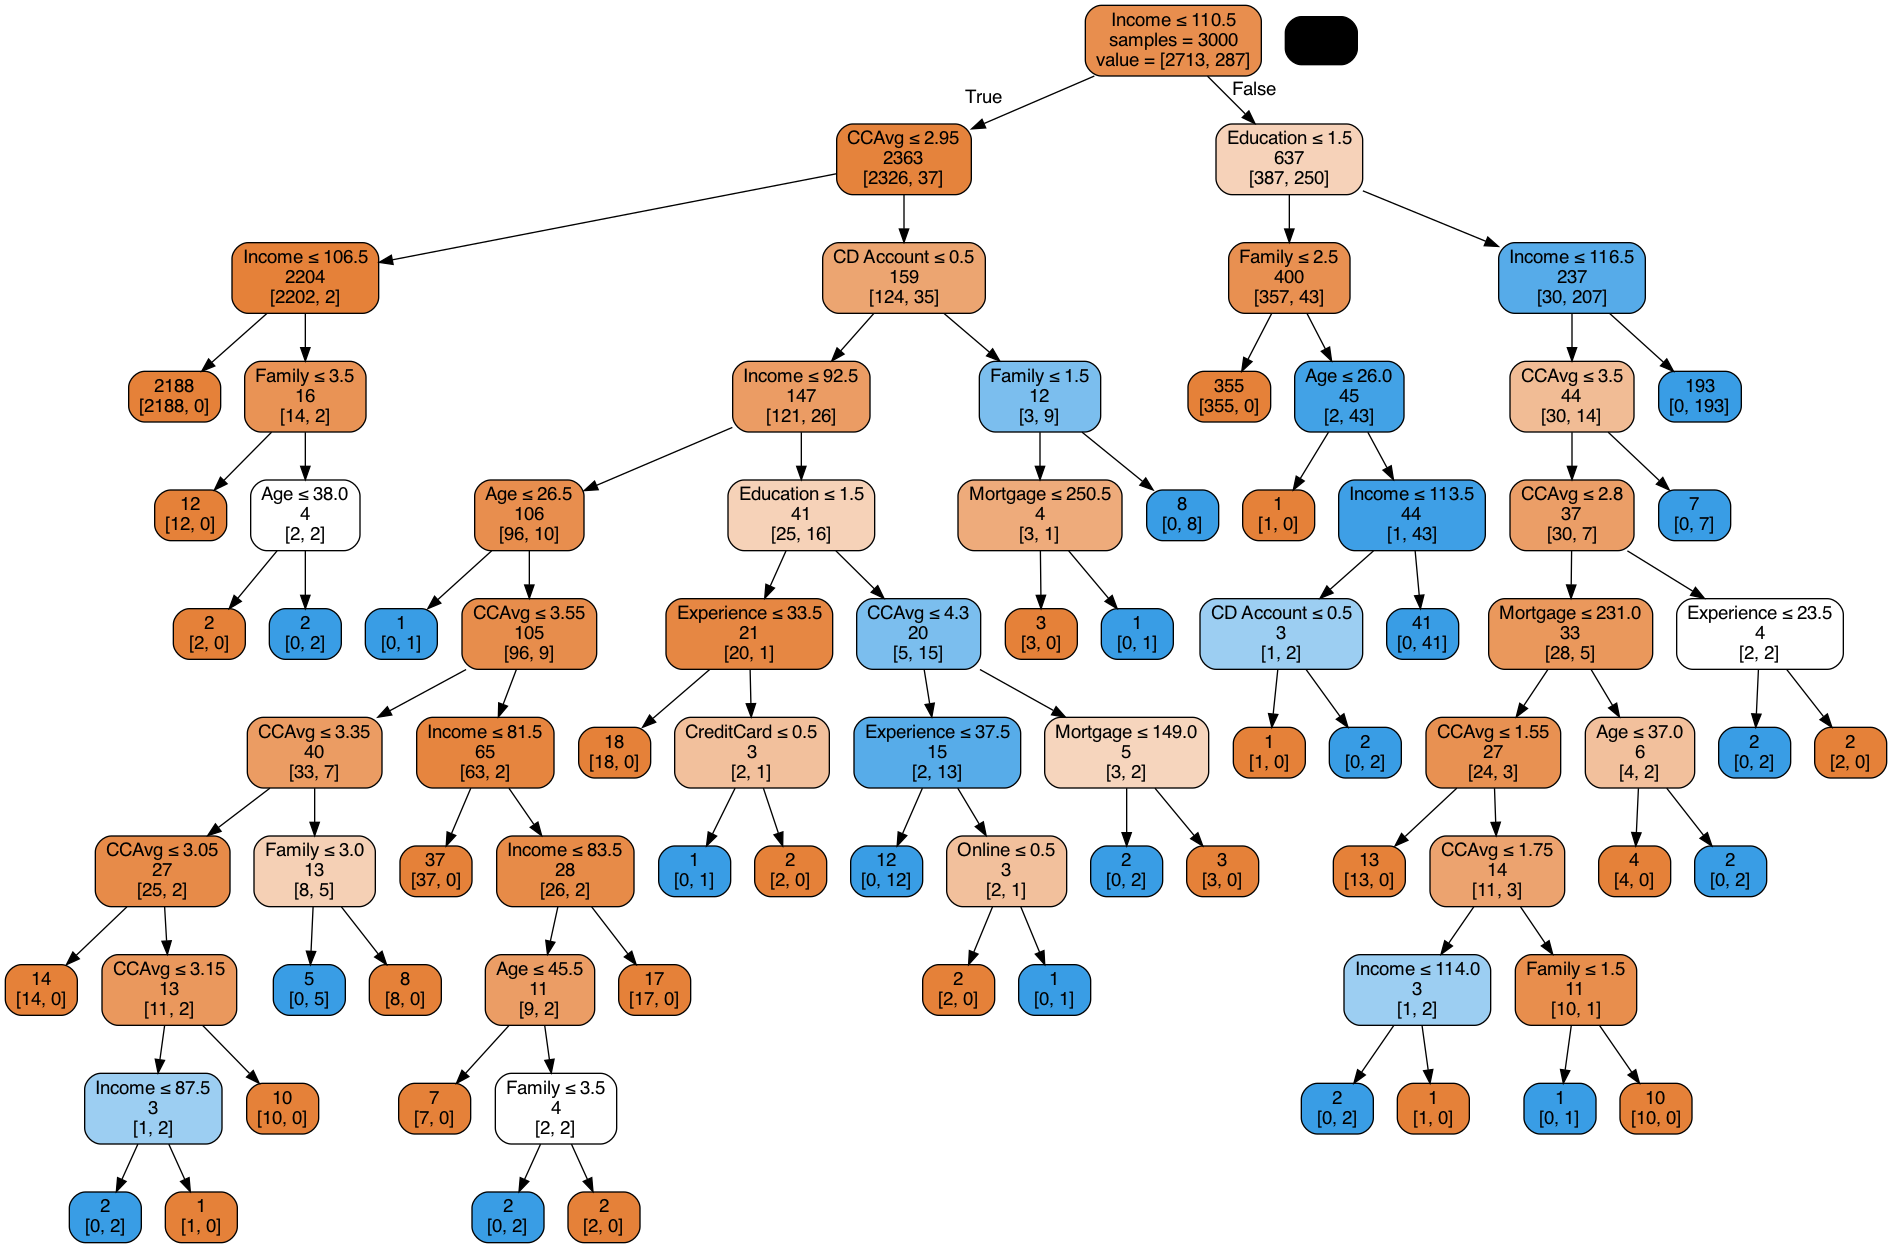

In [10]:
x = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
train_x, valid_x, train_y, valid_y = train_test_split(x,y,test_size=0.4,random_state=1)

fullClassTree = DecisionTreeClassifier(random_state=1) # max_depth 안쓰면 full-grown tree 줌
fullClassTree.fit(train_x, train_y) # train set으로 fit

plotDecisionTree(fullClassTree, feature_names=train_x.columns)

In [13]:
# code for classifying the validation data using a tree 
# and computing the confusion matrices and accuracy for the training and validation data

In [14]:
print('<train set>')
classificationSummary(train_y, fullClassTree.predict(train_x))
print('\n\n<valid set>')
classificationSummary(valid_y, fullClassTree.predict(valid_x))

<train set>
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287


<valid set>
Confusion Matrix (Accuracy 0.9790)

       Prediction
Actual    0    1
     0 1790   17
     1   25  168


In [15]:
# code for creating a smaller classification tree

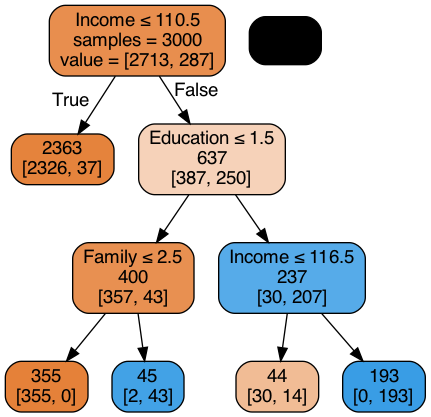

In [18]:
smallclasstree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
                                        # 파라미터 직접 설정
smallclasstree.fit(train_x, train_y)
plotDecisionTree(smallclasstree, feature_names = train_x.columns)

In [19]:
# code for classifying the validation data using a small tree and computing the confusion matrices and 
# accuracy for the training and validation tree

In [21]:
classificationSummary(train_y, smallclasstree.predict(train_x))
classificationSummary(valid_y, smallclasstree.predict(valid_x))

Confusion Matrix (Accuracy 0.9823)

       Prediction
Actual    0    1
     0 2711    2
     1   51  236
Confusion Matrix (Accuracy 0.9770)

       Prediction
Actual    0    1
     0 1804    3
     1   43  150


In [22]:
# code for using GridSearchCV to fine tune method parameters

In [34]:
# Start with an initial guess for parameters

param_grid = {
    'max_depth' : [10,20,30,40],
    'min_samples_split' : [20,40,60,80,100],
    'min_impurity_decrease' : [0, 0.0005, 0.001, 0.005, 0.01]
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1) 
# cv : 교차검정 횟수 / n_jobs : -1 will utilize all available CPUs 
#                  진짜 해당 하드웨어의 CPU(코어)수 말하는듯. -1하면 모든 씨피유 사용해서 매우 뜨거워짐
gridSearch.fit(train_x, train_y)
print('Initial score : ', gridSearch.best_score_)
print('Initial parameters : ', gridSearch.best_params_)

Initial score :  0.9876666666666667
Initial parameters :  {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}


In [35]:
# Adapt grid based on result from initial grid search

param_grid = {
    'max_depth' : list(range(2,16)), # 14 values
    'min_samples_split' : list(range(10,22)), # 11 values
    'min_impurity_decrease' : [0.0009, 0.001, 0.0011] # 3 values
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_x, train_y)
print('Improved score : ', gridSearch.best_score_) # gridSearch.best_score_ : accuracy
print('Improved parameters : ', gridSearch.best_params_) # gridSearch.best_params_ : 격자탐색으로 얻은 최고의 파라미터 값

bestClassTree = gridSearch.best_estimator_ # 격자탐색으로 얻은 최고의 모델

Improved score :  0.9873333333333333
Improved score :  {'max_depth': 4, 'min_impurity_decrease': 0.0011, 'min_samples_split': 13}


In [36]:
gridSearch.best_estimator_

DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.0011,
                       min_samples_split=13, random_state=1)

In [37]:
# code for plotting and evaluating performance of fine-tuned classificaion tree

In [39]:
# fine-tuned tree : training
classificationSummary(train_y, bestClassTree.predict(train_x))

# fine-tuned tree : validation
classificationSummary(valid_y, bestClassTree.predict(valid_x))

Confusion Matrix (Accuracy 0.9867)

       Prediction
Actual    0    1
     0 2708    5
     1   35  252
Confusion Matrix (Accuracy 0.9815)

       Prediction
Actual    0    1
     0 1801    6
     1   31  162


In [1]:
# code for building a regression tree

In [2]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
toyotaCorolla_df = pd.read_csv('ToyotaCorolla.csv').iloc[:1000,:]
toyotaCorolla_df = toyotaCorolla_df.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})

predictors = ['Age', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 
              'Doors', 'Tax', 'Weight']
outcome = 'Price'

X = pd.get_dummies(toyotaCorolla_df[predictors], drop_first=True)
y = toyotaCorolla_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# user grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50]
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)


Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [10]:
param_grid = {
    'max_depth':[3,4,5,6,7,8,9,10,11,12],
    'min_impurity_decrease':[0,0.001,0.002,0.003,0.005,0.006,0.007,0.008],
    'min_samples_split':[14,15,16,18,20, ]
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters : ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_
regressionSummary(train_y, regTree.predict(train_X))
regressionSummary(valid_y, regTree.predict(valid_X))

Improved parameters :  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 16}

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1058.8202
            Mean Absolute Error (MAE) : 767.7203
          Mean Percentage Error (MPE) : -0.8074
Mean Absolute Percentage Error (MAPE) : 6.8325

Regression statistics

                      Mean Error (ME) : 60.5241
       Root Mean Squared Error (RMSE) : 1554.9146
            Mean Absolute Error (MAE) : 1026.3487
          Mean Percentage Error (MPE) : -1.3082
Mean Absolute Percentage Error (MAPE) : 9.2311


In [11]:
# code for running a random forest, plotting variable importance plot, and computing accuracy 

In [12]:
bank_df = pd.read_csv("UniversalBank.csv")
bank_df.drop(columns = ['ID','ZIP Code'], inplace = True)

x = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
train_x, valid_x, train_y, valid_y = train_test_split(x,y,test_size=0.4,random_state=1)

rf = RandomForestClassifier(n_estimators=500, random_state=1) 
# n_estimators : 모델에서 사용할 트리 갯수(학습시 생성할 트리 갯수)
rf.fit(train_x, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [15]:
# variable (feature) importance plot
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis = 0) 
# rf.estimators_ : random forest로 구한 나무 모델 500개. 
# np.std(arr, axis = 0)는 열을 따라 표준 편차를 계산
# std : 나무 500개 각각의 변수 중요도로 각 변수에 대하여 표준편차를 구함

df = pd.DataFrame({'Feature':train_x.columns, 'importance':importances, 'std':std})
df = df.sort_values('importance')
print(df)

               Feature  importance       std
7   Securities Account    0.003964  0.004998
9               Online    0.006394  0.005350
10          CreditCard    0.007678  0.007053
6             Mortgage    0.034243  0.023469
1           Experience    0.035539  0.016061
0                  Age    0.036258  0.015858
8           CD Account    0.057917  0.043185
3               Family    0.111375  0.053146
4                CCAvg    0.172105  0.103011
5            Education    0.200772  0.101002
2               Income    0.333756  0.129227


In [19]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1791095845),
 DecisionTreeClassifier(max_features='auto', random_state=2135392491),
 DecisionTreeClassifier(max_features='auto', random_state=946286476),
 DecisionTreeClassifier(max_features='auto', random_state=1857819720),
 DecisionTreeClassifier(max_features='auto', random_state=491263),
 DecisionTreeClassifier(max_features='auto', random_state=550290313),
 DecisionTreeClassifier(max_features='auto', random_state=1298508491),
 DecisionTreeClassifier(max_features='auto', random_state=2143362693),
 DecisionTreeClassifier(max_features='auto', random_state=630311759),
 DecisionTreeClassifier(max_features='auto', random_state=1013994432),
 DecisionTreeClassifier(max_features='auto', random_state=396591248),
 DecisionTreeClassifier(max_features='auto', random_state=1703301249),
 DecisionTreeClassifier(max_features='auto', random_state=799981516),
 DecisionTreeClassifier(max_features='auto', random_state=1666063943),
 DecisionTreeCl

In [20]:
std

array([0.01585823, 0.01606125, 0.12922679, 0.05314644, 0.10301138,
       0.10100208, 0.02346946, 0.00499787, 0.04318541, 0.00534985,
       0.00705293])

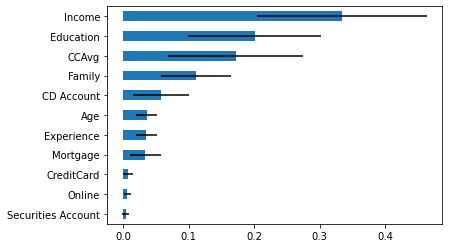

In [23]:
ax = df.plot(kind='barh',xerr='std',x='Feature', legend=False)
# barh : 가로막대플롯
ax.set_ylabel('')
plt.show()

In [24]:
# confusion matrix for validation set
classificationSummary(valid_y, rf.predict(valid_x))

Confusion Matrix (Accuracy 0.9820)

       Prediction
Actual    0    1
     0 1803    4
     1   32  161


In [25]:
# code for running boosted tree

In [26]:
boost = GradientBoostingClassifier()
boost.fit(train_x, train_y)
classificationSummary(valid_y, boost.predict(valid_x))

Confusion Matrix (Accuracy 0.9835)

       Prediction
Actual    0    1
     0 1799    8
     1   25  168
